<a href="https://colab.research.google.com/github/Piyush53r/Titanic-Survival-Pridiction/blob/main/Titanic_Survival_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Configure visualisations
%matplotlib inline
plt.style.use('ggplot')

# Configure seaborn
sns.set_style('white',{"xtick.major.size": 5, "ytick.major.size": 5})


plt.rcParams['figure.figsize'] = (15,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 18

import warnings
warnings.filterwarnings('ignore')

In [2]:
# The training set should be used to build your machine learning models.
train_df = pd.read_csv('train.csv')

# The test set should be used to see how well your model performs on unseen data.
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df['Sex']= train_df['Sex'].str.capitalize()
test_df['Sex']= test_df['Sex'].str.capitalize()

In [6]:
# Combine train and test set
all_data = pd.concat([train_df, test_df], ignore_index=True).reindex(columns=train_df.columns)

In [7]:
# Features are available in the dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_df.info()
print('--' * 20)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Missing Value : Age, Fare, Cabin and Embarked features contain blank, null or empty values.


In [9]:
missingValue = pd.DataFrame(all_data.iloc[:,2:].isnull().sum(axis=0).sort_values(ascending=False),columns=['NaN'])
missingValue["Percentage"]= missingValue.NaN.apply(lambda x: '{:.2f}%'.format((float(x)/all_data.shape[0])*100))
missingValue[missingValue.NaN > 0]

,NaN,Percentage
Cabin,1014,77.46%
Age,263,20.09%
Embarked,2,0.15%
Fare,1,0.08%


In [10]:
# Text Annotation
def text_annotate(cnt):
    for i in cnt.patches:
        height = i.get_height()
        cnt.text(i.get_x() + i.get_width()/2., height,'%d' % int(height),ha='center',va='bottom')

In [11]:
pclass = {1:'Upper',2:'Middle',3:'Lower'}
survived = {0:'No',1:'Yes'}
embark = {'C':' Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

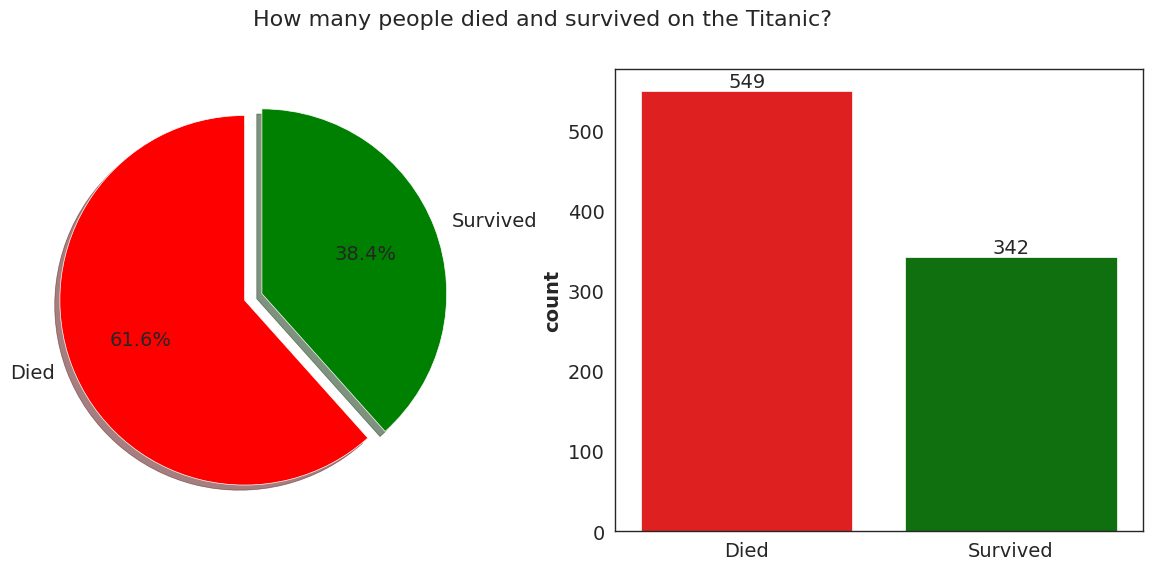

In [12]:
fig,axes=plt.subplots(1,2)
plt.suptitle('How many people died and survived on the Titanic?',fontsize=16)
labels = ['Died','Survived']
# Pie chart
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=axes[0],
                                             labels=labels,colors=['red','green'], shadow=True, startangle=90)

axes[0].set_ylabel('')
# Bar chart
cnt = sns.countplot(x='Survived', data=train_df, palette=['red', 'green'], ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_xticklabels(labels)
text_annotate(cnt)
plt.show()

Passenger’s Gender

In [13]:
train_df.groupby(['Sex','Survived'])['Survived'].count().unstack().rename(columns=survived)

Survived,No,Yes
Sex,,
Female,81,233
Male,468,109


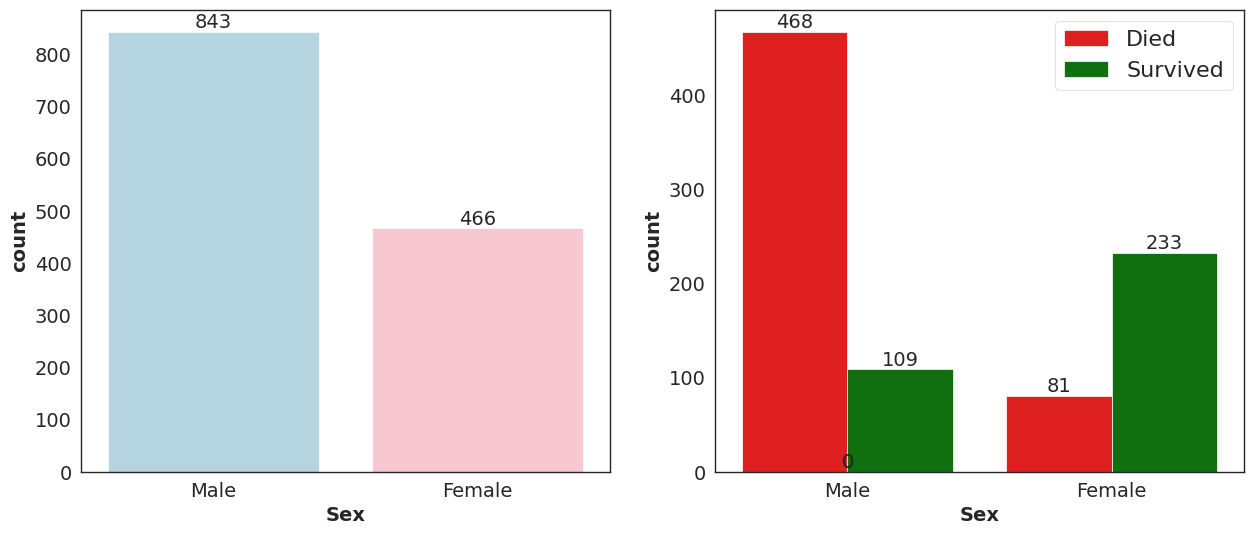

In [14]:
f,ax=plt.subplots(1,2)
cnt2 = sns.countplot(x='Sex', data=all_data, palette=['lightblue', 'pink'],ax=ax[0])
text_annotate(cnt2)
cnt = sns.countplot(x='Sex', hue='Survived', data=train_df, palette=['red', 'green'],ax=ax[1])
ax[1].legend(['Died','Survived'])
text_annotate(cnt)

In [15]:
def get_stats(survival):
    return {'Died':survival.count()-survival.sum(),'Survived': survival.sum(),'All': survival.count(),
            'Survived(%)':'{:.2f}%'.format(survival.mean()*100)}

In [16]:
train_df['Survived'].groupby(train_df['Sex']).apply(get_stats).unstack()

,Died,Survived,All,Survived(%)
Sex,,,,
Female,81,233,314,74.20%
Male,468,109,577,18.89%


In [17]:
train_df['Survived'].groupby(train_df['Pclass']).apply(get_stats).unstack().rename(index=pclass)

,Died,Survived,All,Survived(%)
Pclass,,,,
Upper,80,136,216,62.96%
Middle,97,87,184,47.28%
Lower,372,119,491,24.24%


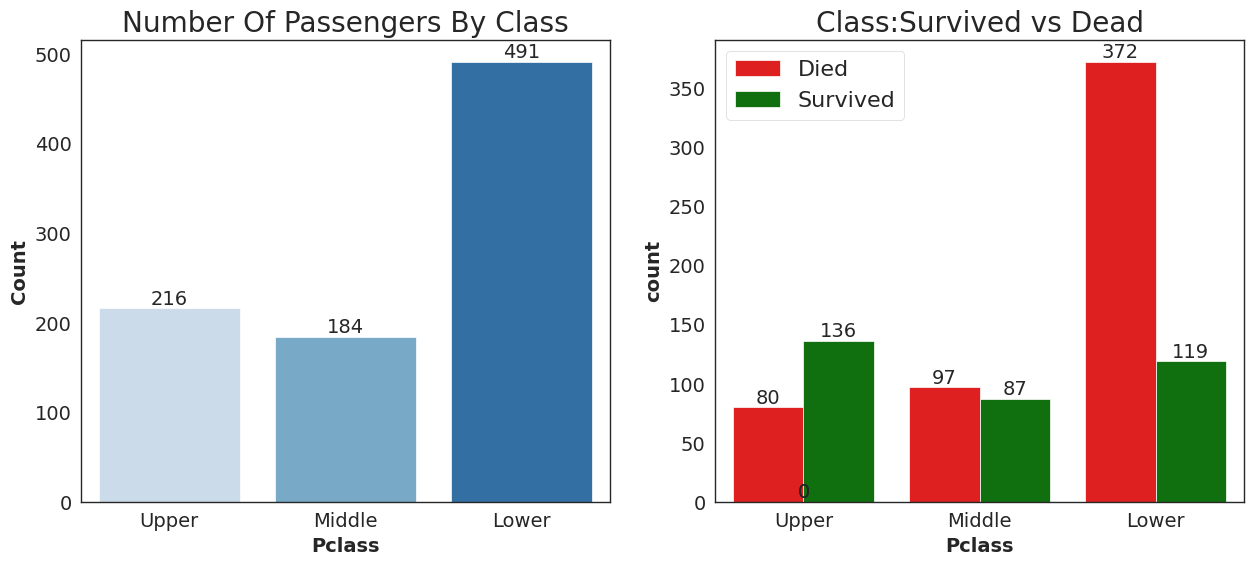

In [18]:
f,ax=plt.subplots(1,2)
labels = ['Upper','Middle','Lower']
cnt = sns.countplot(x='Pclass', palette='Blues', data=train_df, ax=ax[0])
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(labels)
text_annotate(cnt)

cnt2 = sns.countplot(x='Pclass', hue='Survived', palette=['red', 'green'], data=train_df, ax=ax[1])
ax[1].set_title('Class:Survived vs Dead')
ax[1].set_xticklabels(labels)
ax[1].legend(['Died','Survived'])
text_annotate(cnt2)

plt.show()

In [19]:
train_df.pivot_table(index='Sex', columns='Pclass', aggfunc={'Survived':'sum'}).rename(columns=pclass)

Survived             
Pclass    Upper Middle Lower
Sex                         
Female       91     70    72
Male         45     17    47

In [20]:
average = lambda x: '{:.2f}%'.format(np.mean(x)*100)
train_df.pivot_table(index='Sex', columns='Pclass', aggfunc={'Survived': average}).rename(columns=pclass)

Survived                
Pclass    Upper  Middle   Lower
Sex                            
Female   96.81%  92.11%  50.00%
Male     36.89%  15.74%  13.54%

In [21]:
pd.crosstab([train_df['Sex'],train_df['Survived']],train_df['Pclass'],
            margins=True).rename(columns=pclass,index=survived)

Pclass           Upper  Middle  Lower  All
Sex    Survived                           
Female No            3       6     72   81
       Yes          91      70     72  233
Male   No           77      91    300  468
       Yes          45      17     47  109
All                216     184    491  891

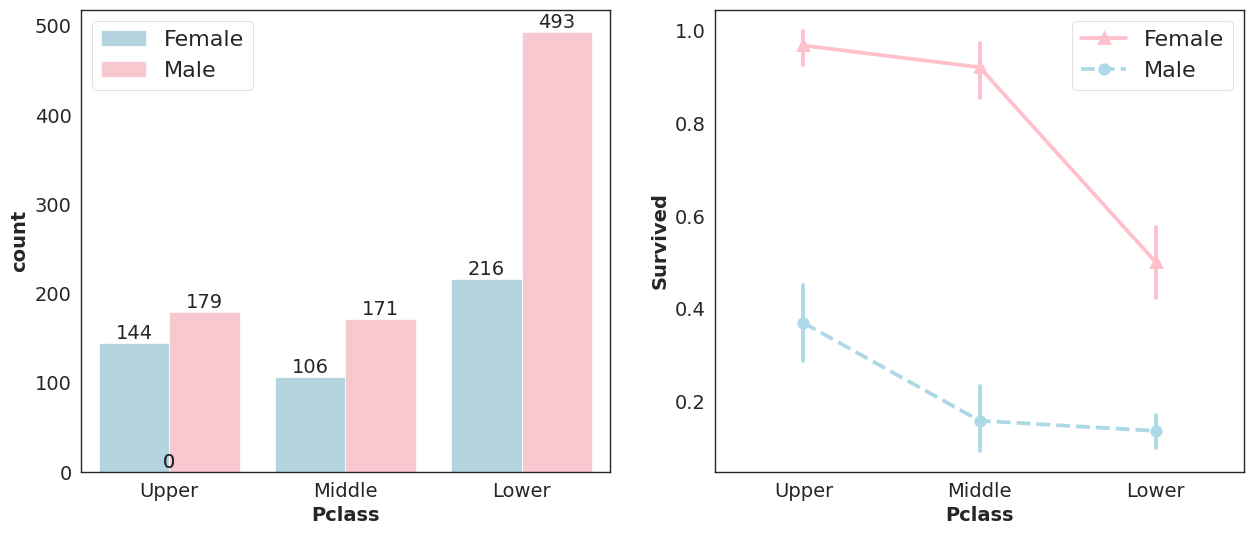

In [22]:
f,ax=plt.subplots(1,2)
cnt = sns.countplot(x='Pclass', hue='Sex', palette=['Lightblue', 'Pink'], data=all_data, ax=ax[0])
ax[0].set_xticklabels(labels)
ax[0].legend().set_title('')
text_annotate(cnt)
cnt2 = sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train_df,
              palette={'Male': 'lightblue', 'Female': 'pink'},
              markers=['^', 'o'], linestyles=['-', '--'],ax=ax[1])
ax[1].set_xticklabels(labels)
ax[1].legend().set_title('')
plt.show()

Age

In [23]:
print('Oldest Passenger was of:',all_data['Age'].max())
print('Youngest Passenger was of:',all_data['Age'].min())

Oldest Passenger was of: 80.0
Youngest Passenger was of: 0.17


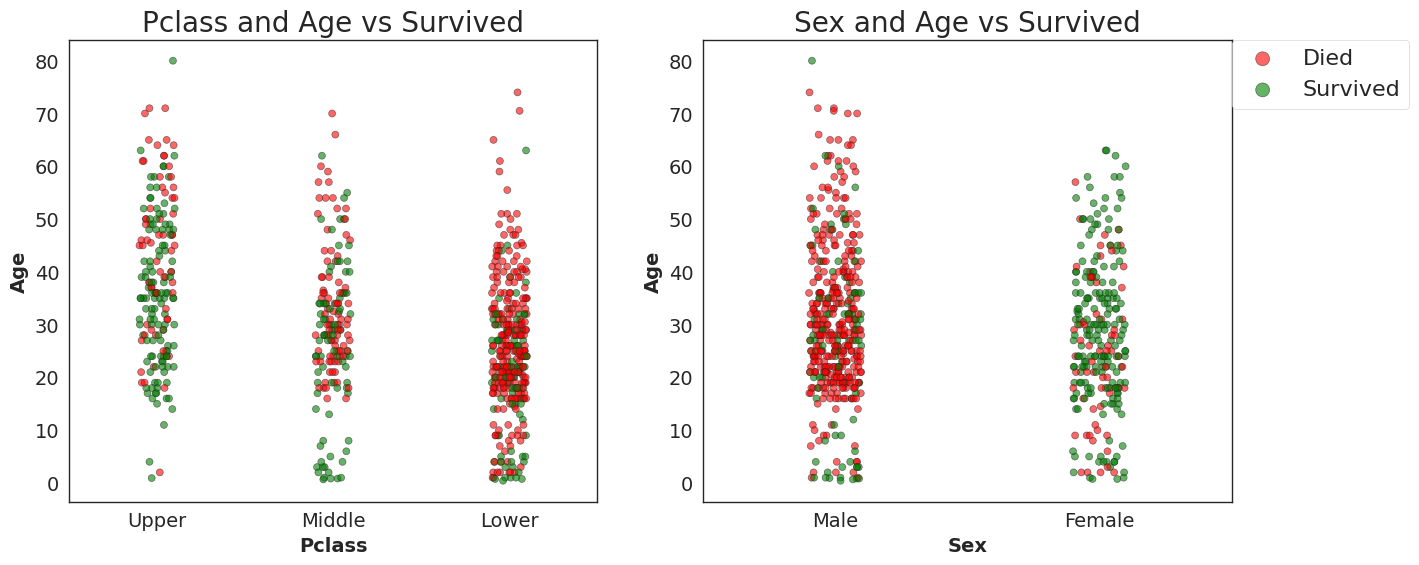

In [24]:
f,ax=plt.subplots(1,2)
sns.stripplot(y='Age', x='Pclass', hue='Survived', jitter=True,
              linewidth=0.5, palette= ['red','green'], alpha=.60, data=all_data, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_xticklabels(labels)
ax[0].legend_.remove()
sns.stripplot(y='Age', x='Sex', hue='Survived', jitter=True,
              linewidth=0.5, palette= ['red','green'],alpha=.60, data=all_data, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[0].set_xticklabels(labels)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()

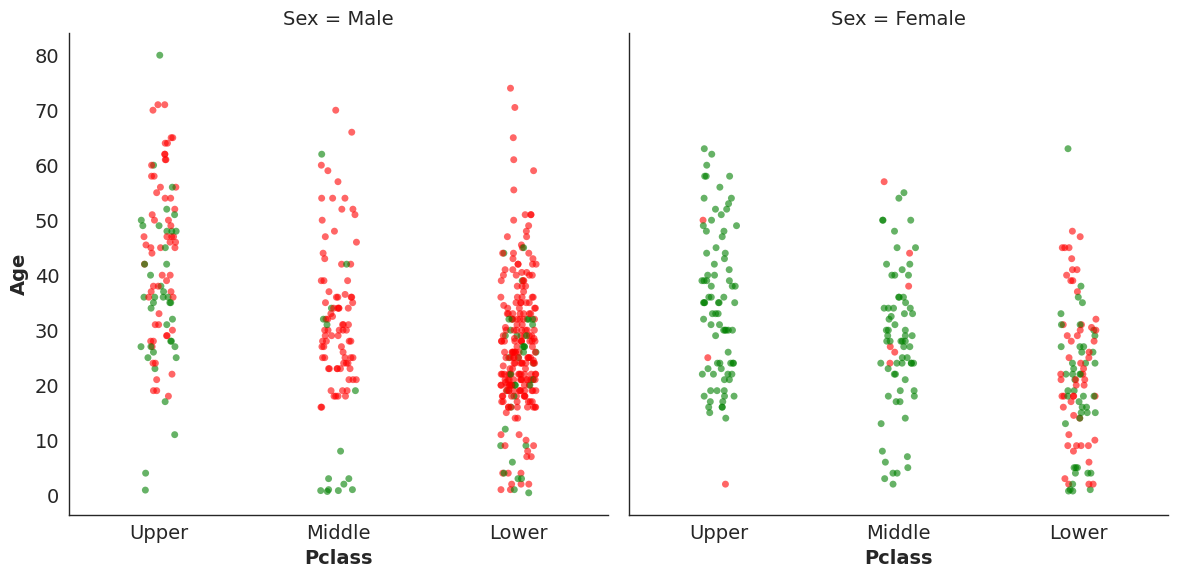

In [25]:
scatplot = sns.catplot(x="Pclass", y="Age", hue="Survived", col="Sex",
               kind="strip", palette=['red', 'green'], jitter=True, height=6, alpha=.60, legend=False, data=all_data)
scatplot.set_xticklabels(labels);

In [26]:
all_data['Title'] = 0
for i in all_data:
    all_data['Title'] = all_data['Name'].str.extract('([A-Za-z]+)\.')

In [27]:
pd.crosstab(all_data['Title'],all_data['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
Female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
Male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [28]:
officer = ['Capt','Col','Dr','Major','Rev']
nobility = ['Countess','Don','Dona','Jonkheer','Lady','Sir']
all_data['Title'].replace(officer, 'Officer', inplace=True)
all_data['Title'].replace(nobility, 'Nobility', inplace=True)
all_data['Title'].replace(['Mlle','Ms', 'Mme'], ['Miss', 'Miss', 'Mrs'],inplace=True)

In [29]:
all_data.groupby(['Sex', 'Title']).size().unstack(fill_value=0)

Title,Master,Miss,Mr,Mrs,Nobility,Officer
Sex,,,,,,
Female,0,264,0,198,3,1
Male,61,0,757,0,3,22


In [30]:
# Check missing value of Age per Title
all_data.groupby('Title').agg(Missing_Value=('Age', lambda x: x.isnull().sum()))

,Missing_Value
Title,
Master,8
Miss,51
Mr,176
Mrs,27
Nobility,0
Officer,1


In [31]:
# Check the Average Age by Sex, Title and Passenger Class.
group_mean = all_data.groupby(['Sex','Pclass','Title'])['Age'].mean().round()
group_mean

Sex     Pclass  Title   
Female  1       Miss        30.0
                Mrs         43.0
                Nobility    40.0
                Officer     49.0
        2       Miss        21.0
                Mrs         34.0
        3       Miss        17.0
                Mrs         32.0
Male    1       Master       7.0
                Mr          41.0
                Nobility    42.0
                Officer     51.0
        2       Master       3.0
                Mr          32.0
                Officer     41.0
        3       Master       6.0
                Mr          28.0
Name: Age, dtype: float64

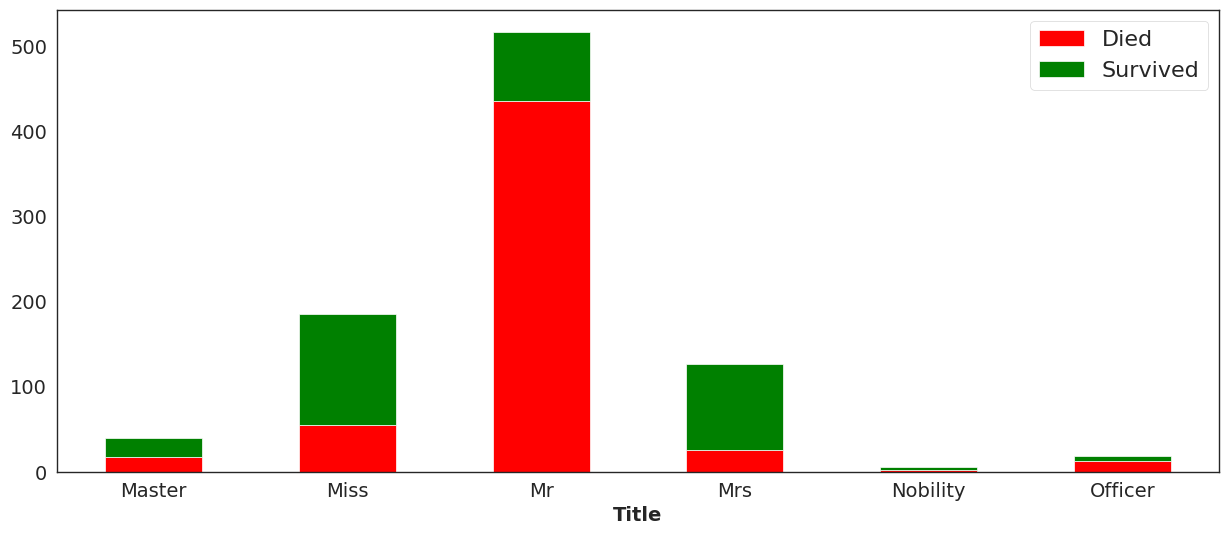

In [32]:
title_survival = all_data.groupby(['Title','Survived'])['Survived'].count().unstack('Survived')
title_survival.plot(kind='bar', color=['red', 'green'], stacked=True, rot=360)
plt.legend(['Died', 'Survived'])
plt.show()

In [33]:
# Fill missing age with the average Age by Sex, Title and Passenger Class.
all_data['Age'].fillna(all_data.groupby(['Sex','Pclass','Title'])['Age'].transform('mean'),inplace=True)

In [34]:
all_data[pd.isnull(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",Male,60.5,0,0,3701,NaN,NaN,S,Mr


In [35]:
# Fill missing fare value with median fare for class and embarkment
all_data['Fare'].fillna(all_data.groupby(['Pclass','Embarked'])['Fare'].transform("median"), inplace=True)

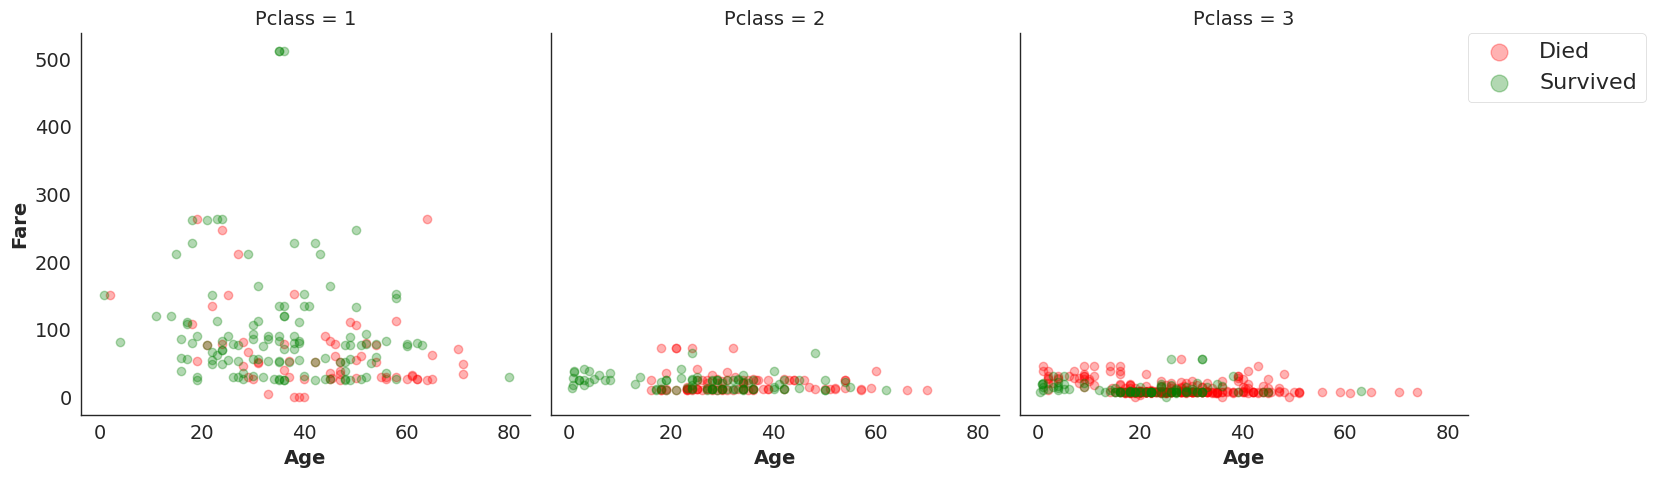

In [36]:
# Plot a scatter plot of 'Age' against 'Fare'.
sns.lmplot(x='Age', y='Fare', hue='Survived',col='Pclass', palette=['red','green'],
           data=train_df, fit_reg=False, scatter_kws={'alpha':0.3},legend=False)
plt.legend(['Died','Survived'],bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,markerscale=2)
plt.show()

In [37]:
# Fill Embarked NaN values of 'S' most frequent value "Embarked" (S).
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace = True)

In [38]:
train_df['Survived'].groupby(train_df['Embarked']).apply(get_stats).unstack().rename(index=embark)

,Died,Survived,All,Survived(%)
Embarked,,,,
Cherbourg,75,93,168,55.36%
Queenstown,47,30,77,38.96%
Southampton,427,217,644,33.70%


In [39]:
train_df.pivot_table(index='Sex', columns='Embarked', aggfunc={'Survived': average}).rename(columns=embark)

Survived                       
Embarked  Cherbourg Queenstown Southampton
Sex                                       
Female       87.67%     75.00%      68.97%
Male         30.53%      7.32%      17.46%

In [40]:
train_df.pivot_table(index='Pclass', columns='Embarked', aggfunc={'Survived': average}).rename(index=pclass,columns=embark)

Survived                       
Embarked  Cherbourg Queenstown Southampton
Pclass                                    
Upper        69.41%     50.00%      58.27%
Middle       52.94%     66.67%      46.34%
Lower        37.88%     37.50%      18.98%

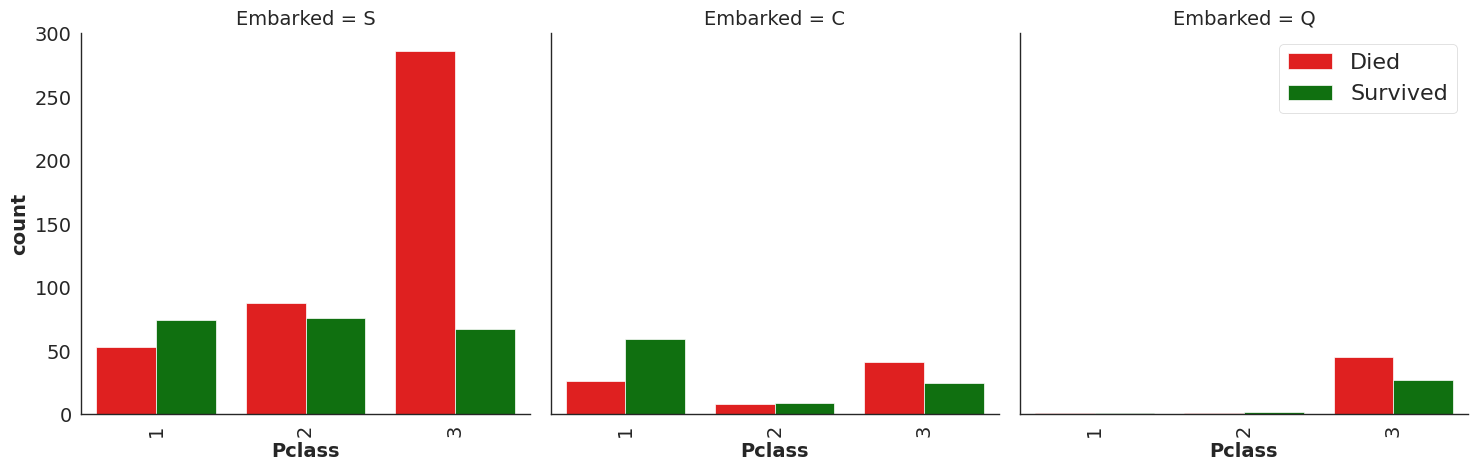

In [41]:
embark = sns.catplot(x='Pclass', hue='Survived', col='Embarked',
                     kind='count', palette=['red', 'green'], legend=False, data=train_df)
embark.set_xticklabels(rotation=90)
plt.legend(['Died', 'Survived'])
plt.show()

In [42]:
def survival_chart(feature,target_var):
    sns.factorplot(x=feature, y=target_var, data=train_df, kind="bar", size = 6 , palette = "muted")

In [43]:
train_df['Survived'].groupby(train_df['SibSp']).apply(get_stats).unstack()

,Died,Survived,All,Survived(%)
SibSp,,,,
0,398,210,608,34.54%
1,97,112,209,53.59%
2,15,13,28,46.43%
3,12,4,16,25.00%
4,15,3,18,16.67%
5,5,0,5,0.00%
8,7,0,7,0.00%


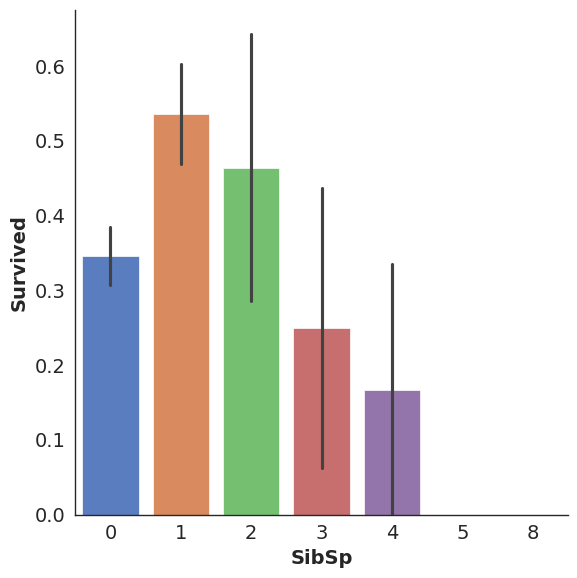

In [44]:
# Explore SibSp feature vs Survived
def survival_chart(feature, target_var):
    sns.catplot(x=feature, y=target_var, data=train_df, kind="bar", height=6, palette="muted")

# Now you can call the function without issues
survival_chart('SibSp', 'Survived')

In [45]:
train_df['Survived'].groupby(train_df['Parch']).apply(get_stats).unstack().sort_values(by='Survived(%)',ascending=False)

,Died,Survived,All,Survived(%)
Parch,,,,
3,2,3,5,60.00%
1,53,65,118,55.08%
2,40,40,80,50.00%
0,445,233,678,34.37%
5,4,1,5,20.00%
4,4,0,4,0.00%
6,1,0,1,0.00%


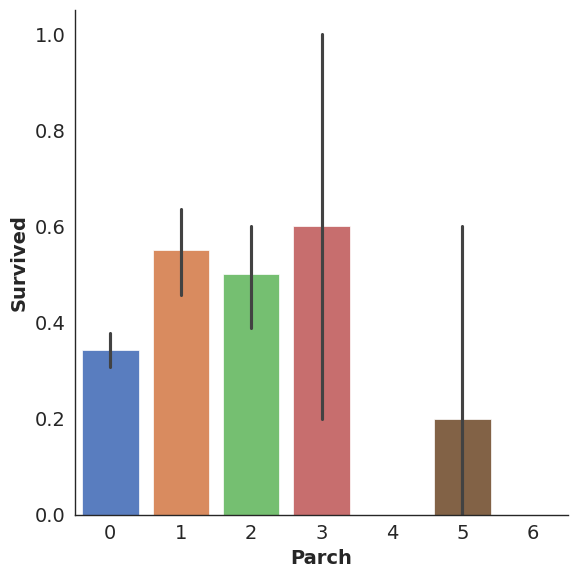

In [46]:
# Explore Parch feature vs Survived
survival_chart('Parch','Survived')

In [47]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1

In [48]:
all_data['Survived'].groupby(all_data['FamilySize']).apply(get_stats).unstack().sort_values(by='Survived(%)',ascending=False)

,Died,Survived,All,Survived(%)
FamilySize,,,,
4,8.0,21.0,29,72.41%
3,43.0,59.0,102,57.84%
2,72.0,89.0,161,55.28%
7,8.0,4.0,12,33.33%
1,374.0,163.0,537,30.35%
5,12.0,3.0,15,20.00%
6,19.0,3.0,22,13.64%
8,6.0,0.0,6,0.00%
11,7.0,0.0,7,0.00%


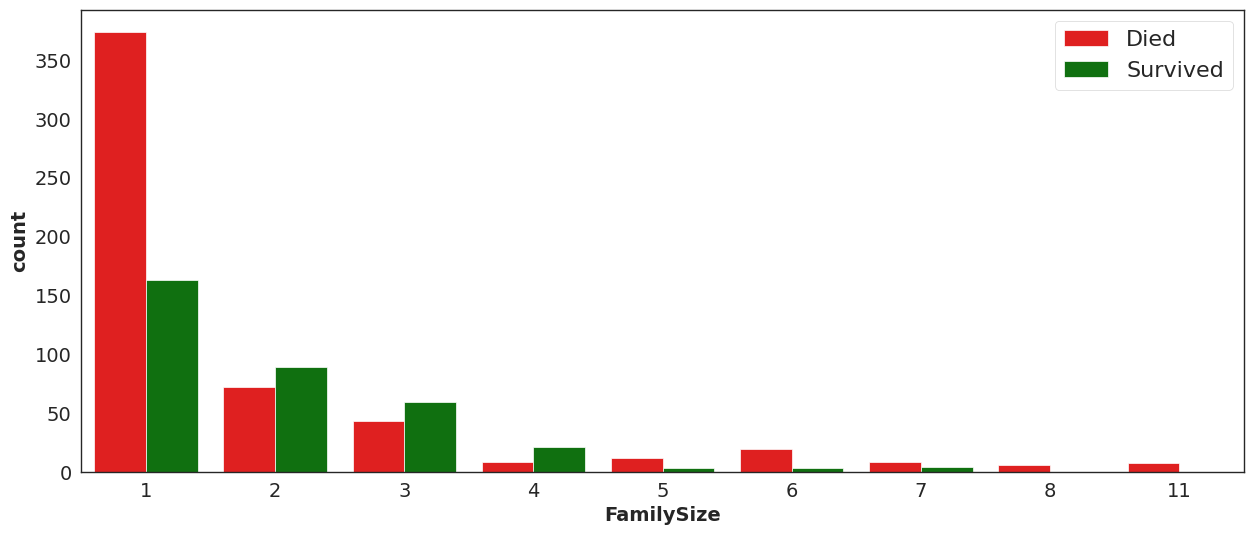

In [49]:
cnt = sns.countplot(x='FamilySize', hue='Survived', palette=['red', 'green'], data=all_data)
cnt.legend(['Died','Survived'])
plt.show()

In [50]:
all_data['TraveledAlone'] = (all_data['FamilySize'] == 1).astype(int)

In [51]:
all_data['Survived'].groupby(all_data['TraveledAlone']).apply(get_stats).unstack().rename(index=survived)

,Died,Survived,All,Survived(%)
TraveledAlone,,,,
No,175.0,179.0,354,50.56%
Yes,374.0,163.0,537,30.35%


Survival vs Age

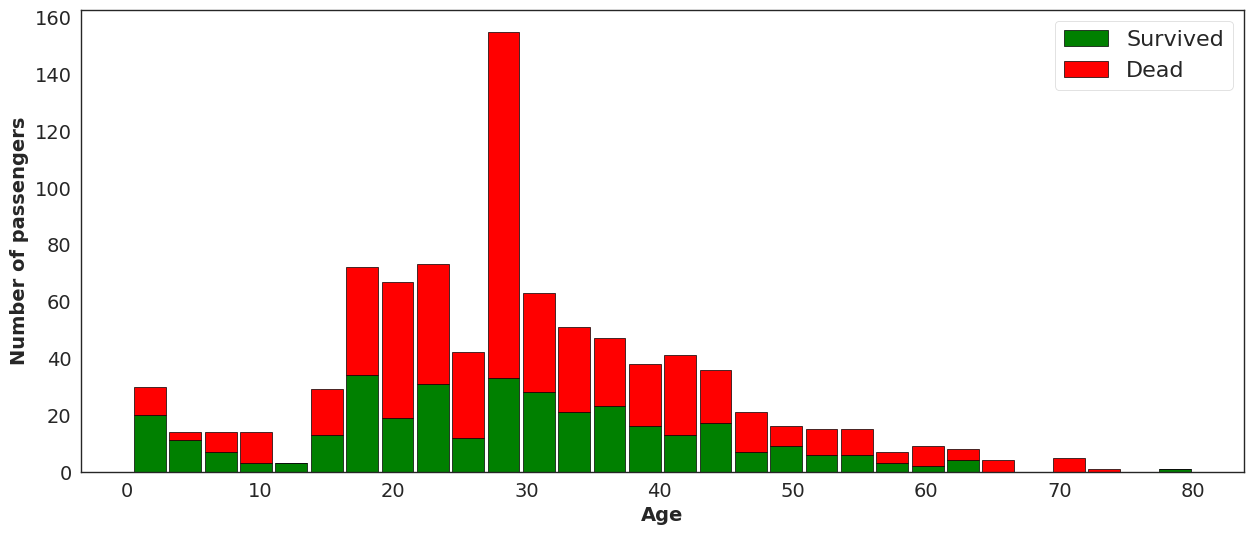

In [52]:
plt.hist([all_data[all_data['Survived']==1]['Age'], all_data[all_data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'],edgecolor='black',rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend();

Age Groupings

In [53]:
def age_range(passenger):
    if passenger['Age'] < 13:
        return 'Child'
    elif passenger['Age'] >= 13 and passenger['Age'] <=19:
        return 'Teenager'
    elif passenger['Age'] >= 20 and passenger['Age'] <=35:
        return 'Young Adult'
    elif passenger['Age'] >= 36 and passenger['Age'] <=55:
        return 'Adult'
    else:
        return 'Elder'

In [54]:
all_data['AgeGrp']= all_data.apply(age_range, axis=1)

In [55]:
all_data['Survived'].groupby(all_data['AgeGrp']).apply(get_stats).unstack().sort_values(by='Survived(%)', ascending=False)

,Died,Survived,All,Survived(%)
AgeGrp,,,,
Child,31.0,42.0,73,57.53%
Teenager,70.0,58.0,128,45.31%
Adult,122.0,84.0,206,40.78%
Young Adult,298.0,146.0,444,32.88%
Elder,28.0,12.0,40,30.00%


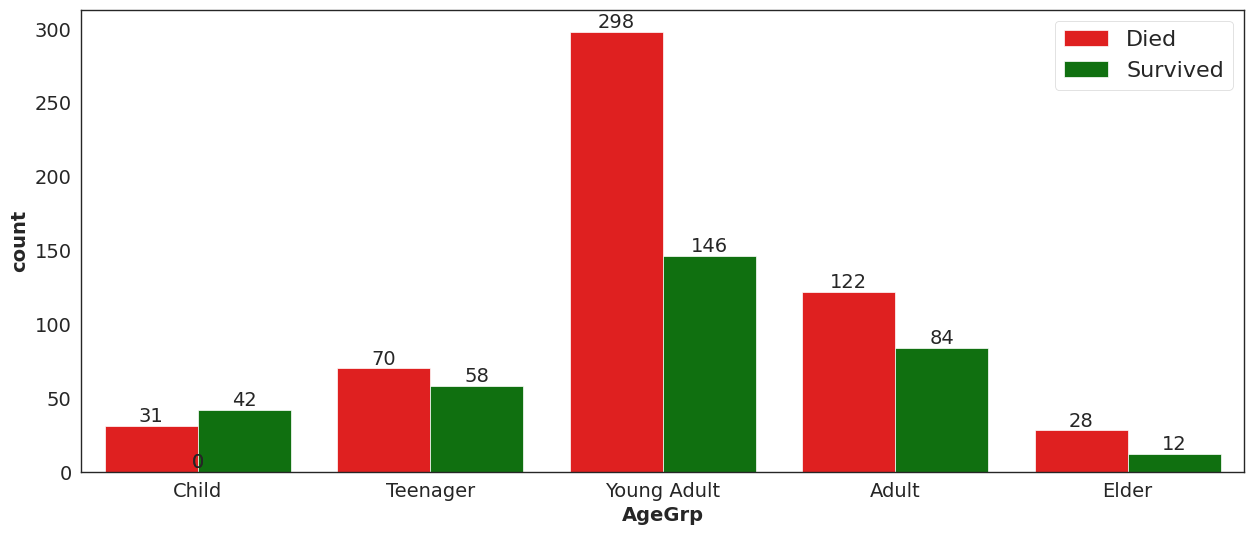

In [56]:
cnt = sns.countplot(x='AgeGrp', hue='Survived', palette=['red', 'green'], order=['Child', 'Teenager', 'Young Adult', 'Adult', 'Elder'], data=all_data)
cnt.legend(['Died','Survived'])
text_annotate(cnt)
plt.show()

In [57]:
# Split the dataframe into its original train and test set
train_df = all_data[0:len(train_df)]
test_df = all_data[len(train_df):]
test_df.drop(['Survived'],axis=1, inplace=True)

In [58]:
drop_column = ['PassengerId', 'Name', 'Cabin', 'Ticket']
all_data = all_data.drop([col for col in drop_column if col in all_data.columns], axis=1)